# Policy iteration

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
W = -100
G = 100
GRID_LAYOUT = np.array([
  [W, W, W, W, W, W, W, W, W, W, W, W],
  [W, W, 0, W, W, W, W, W, W, 0, W, W],
  [W, 0, 0, 0, 0, 0, 0, 0, 0, G, 0, W],
  [W, 0, 0, 0, W, W, W, W, 0, 0, 0, W],
  [W, 0, 0, 0, W, W, W, W, 0, 0, 0, W],
  [W, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, W],
  [W, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, W],
  [W, W, 0, 0, 0, 0, 0, 0, 0, 0, W, W],
  [W, W, W, W, W, W, W, W, W, W, W, W]
])

WALLS = list(np.where(GRID_LAYOUT.flatten()==W)[0])
N_obs = np.prod(GRID_LAYOUT.shape)


## Policy improvement

### Helper functions

In [69]:
def move(state, action):
  if state == 33: 
    return 33, 0, True
  if state in WALLS: 
    return state, 0, False

  if action == 0:
    new_state = state - 12
  elif action == 1:
    new_state = state + 1
  elif action == 2:
    new_state = state + 12
  else:
    new_state = state - 1

  if new_state in WALLS: 
    return state, -100, False
  if new_state == 33:
    return new_state, 100, True
  
  return new_state, 0, False

def greedification(value_function):

  policy = np.zeros((N_obs,4), dtype=float)

  for state in range(N_obs-1):
      next_states = [move(state, a) for a in range(4)]
      next_values = [value_function[x[0]]+x[1] for x in next_states]
      policy[state] = np.zeros(4)
      policy[state][np.argmax(next_values)] = 1.

  return policy

### Policy iteration

In [70]:
#Define parameters
discount_factor = 0.9
max_iterations = 10
max_eval_iterations = 100
alpha = 0.1

#Initialize the policy and value function with zeros
policy = np.ones((N_obs, 4))/4
#policy = np.zeros(N_obs)
value_function = np.zeros(N_obs)

#Perform policy iteration
for i in range(max_iterations):
  if i%5==0: print("Iter", i)

  value_function = np.zeros(N_obs)
  new_value_function = np.zeros(N_obs)
  
  # Policy evaluation
  for _ in range(max_eval_iterations):
    for state in range(N_obs-1):
        # Determine next state based on current policy (sample from policy[state])
        action = np.random.choice(4, p=policy[state])
        next_state, reward, done = move(state, action)
        TD_error = reward + discount_factor * value_function[next_state] - value_function[state]
        new_value_function[state] += alpha * TD_error

    if np.all(np.isclose(value_function, new_value_function)): break

    value_function = new_value_function.copy()

  #print(np.round(value_function))
  grid_to_show = value_function
  grid_to_show[WALLS] = -1e20
  vmin = -400 if i == 0 else -50
  plt.imshow(grid_to_show.reshape(9,12), vmin=vmin, vmax=100, cmap='pink', aspect='auto')
  plt.colorbar()
  plt.show()

  # Policy improvement (greedy)
  new_policy = greedification(value_function)

  if np.all(policy==new_policy):
    break
  
  policy = new_policy

print(f"Finished at {i} iters")

Iter 0


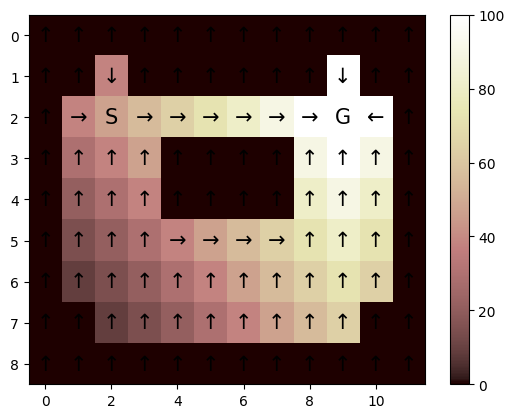

In [ ]:
def get_policy_arrows(policy):
  mapping = {
      0: "\u2191",
      1: "\u2192",
      2: "\u2193",
      3: "\u2190"
  }
  arr = np.vectorize(mapping.get)(policy)
  arr[33] = "G"
  arr[26] = "S"
  return arr.reshape(9,12)

grid_to_show[33] = 100
plt.imshow(grid_to_show.reshape(9,12), vmin=0, vmax=100, cmap='pink', aspect='auto')
plt.colorbar()

for i in range(9):
    for j in range(12):
        # print text policy_arrows in the grid plot
        plt.text(j, i, get_policy_arrows(policy.argmax(axis=1))[i,j], ha='center', va='center', color='black', fontsize=15)
plt.show()